In [189]:
 import json
import matplotlib.pyplot as plt
import os
# Opening JSON file
#f = open('ViLT_Impulse-noise_L5.json')
  
# returns JSON object as 
# a dictionary
#data = json.load(f)


In [190]:
#Name of the models
model_name='ViLT_'


In [191]:
directory='D:\Predefence\experiment\\ff\Reports'

In [192]:
def correct(data):
    num=0
    total=len(data['data'])
    for i in data['data']:
        if( i['correct']==True ):
            num+=1
            
    return (num/total)*100
    

In [220]:
def show_barplot(noise,values):
    #f, ax = plt.subplots(figsize=(18,10))
    plt.rcParams["figure.figsize"] = (12,5)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(noise,values)
    plt.xticks(rotation=60)
    plt.show()
    return 
    

In [194]:
def show_scatterplot(levels,values,name):
    f, ax = plt.subplots(figsize=(18,10))
    plt.scatter(levels, values, c ="blue")
    plt.plot(levels, values)
    plt.title(name)
    plt.show()
    
    

## Analysis of all the noises but separately

In [195]:
#This is for level vs noise graph for every sort of noise. 
def levelvval(name):
    n=[]
    v=[]
    num=1
    for filename2 in os.listdir(directory):
        f = os.path.join(directory, filename2)
        for filename in os.listdir(f):
            if filename[0:len(model_name)+len(name)]==model_name+name:
                f=open(directory + '\\' + name + '_L'+num.__str__()+ '\\' +filename)
                data = json.load(f)
                v.append(correct(data))
                n.append('L'+num.__str__())
                num+=1
    v.sort(reverse=True) #Had to sort because of the anomaly in the weights 
    show_scatterplot(n,v,name)
    #return n,v
    
    
    

In [196]:


all_noise=["Grayscale", "Grayscale-Inverse","Shot-noise","Gaussian-noise","Impulse-noise","Speckle-noise","Defocus-blur","Zoom-Blur","Snow","Brightness","Contrast","Saturation", "Elastic","Pixelate","JPEG-compression","Spatter"]

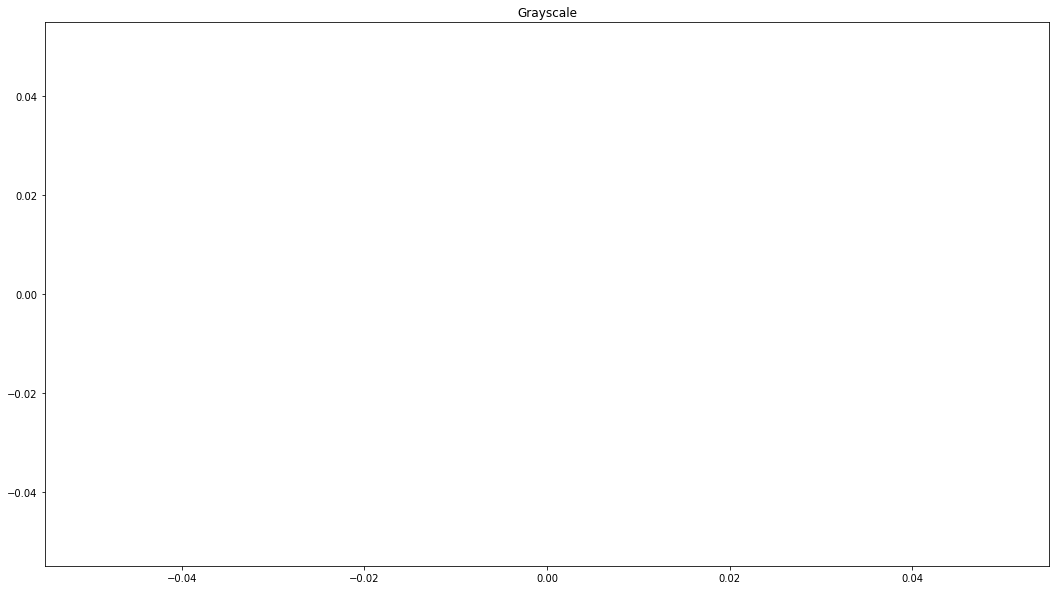

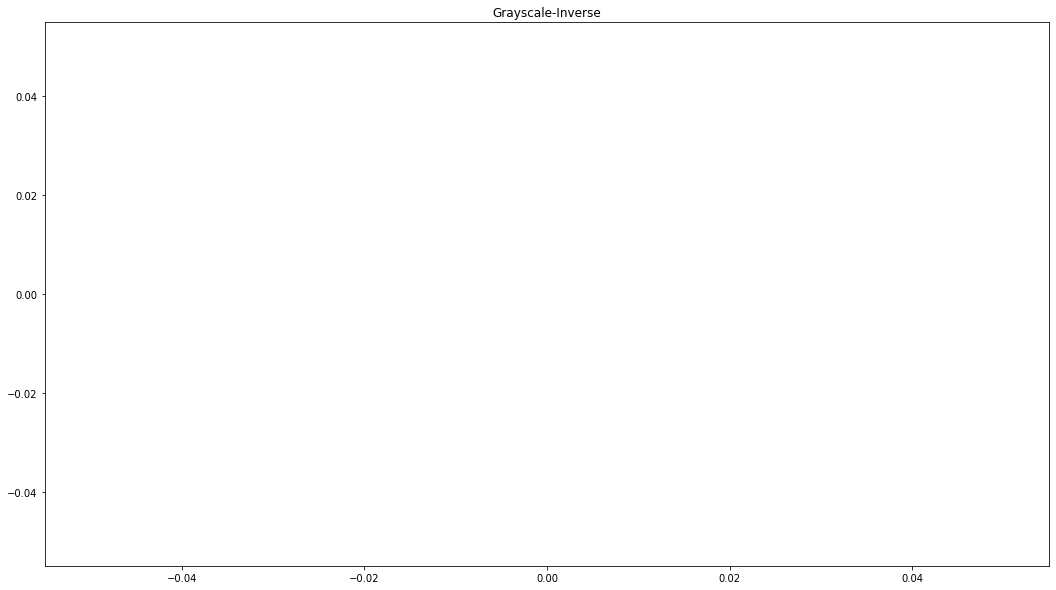

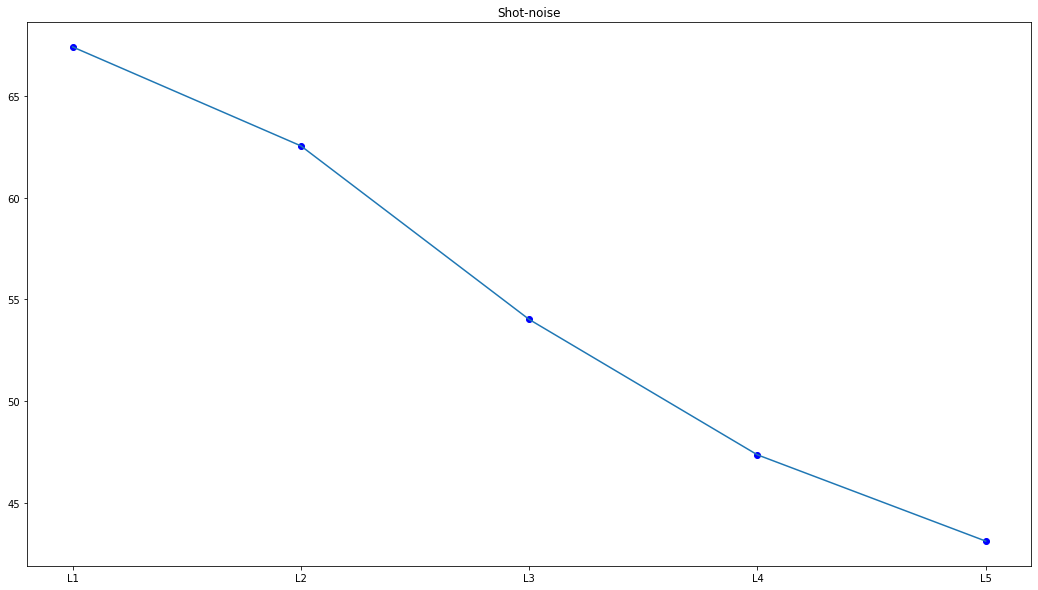

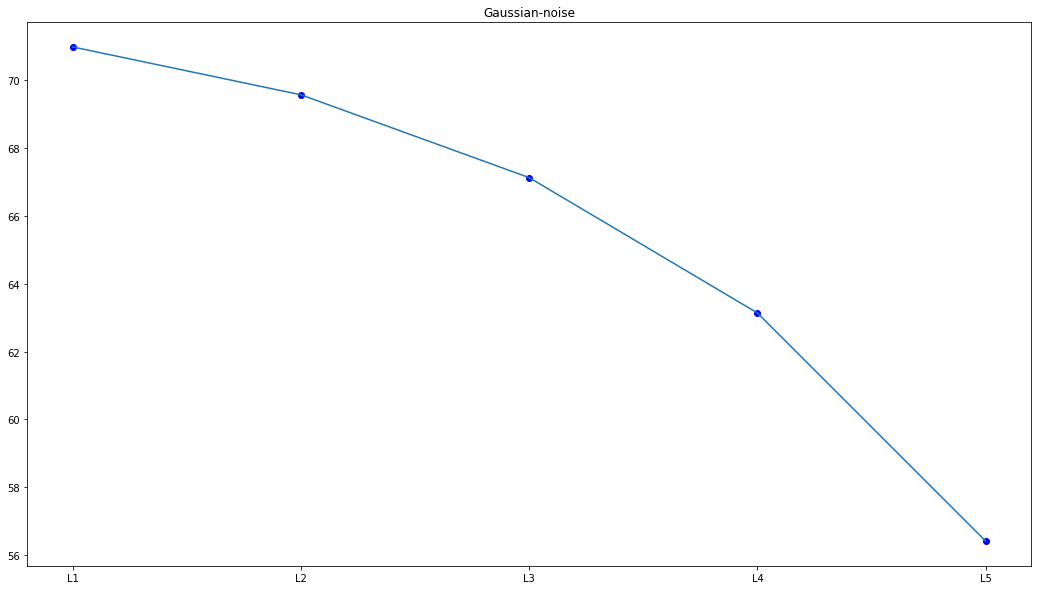

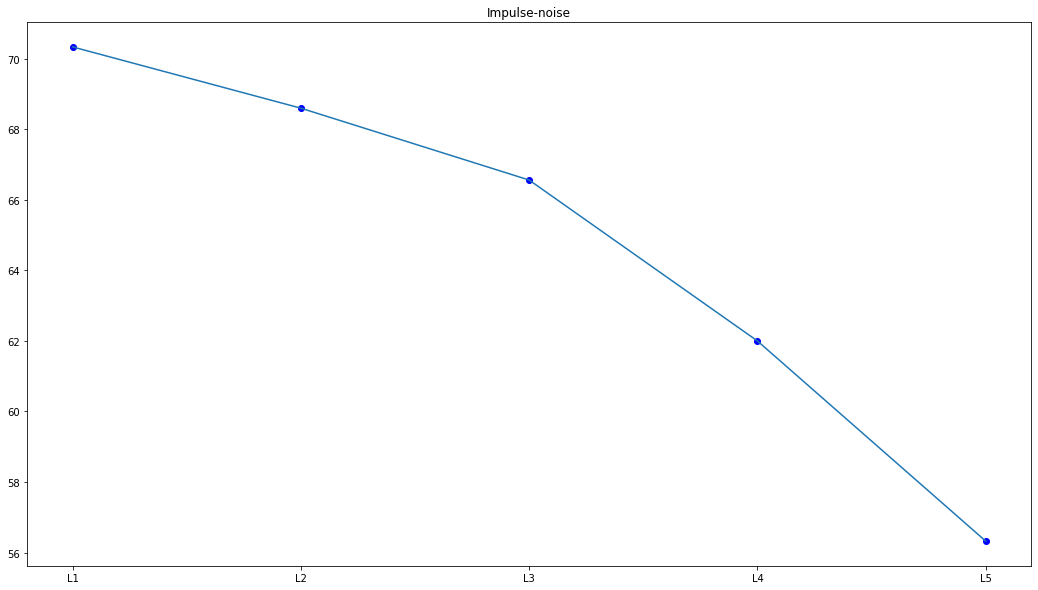

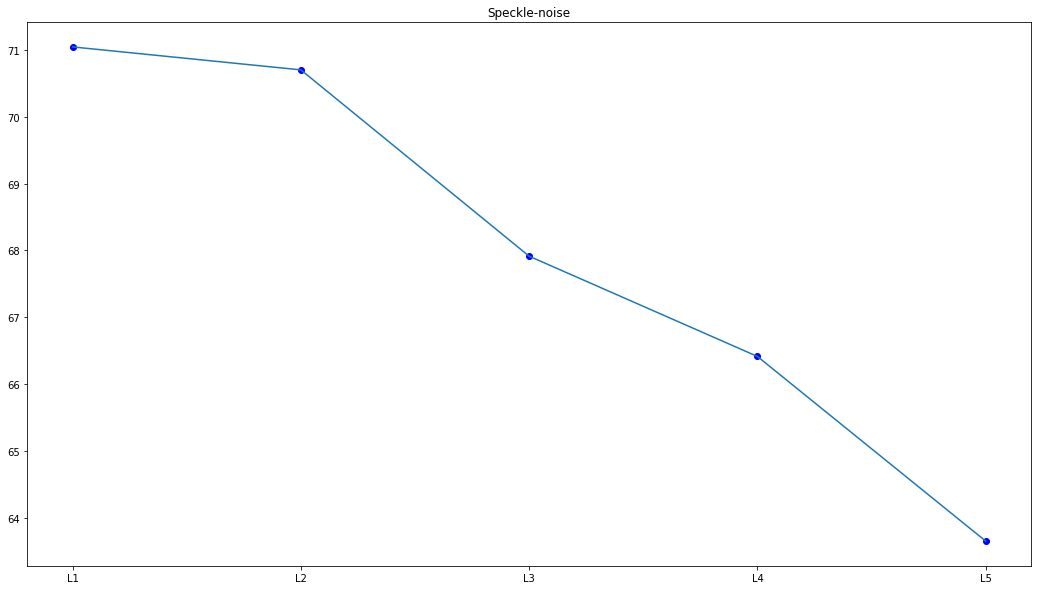

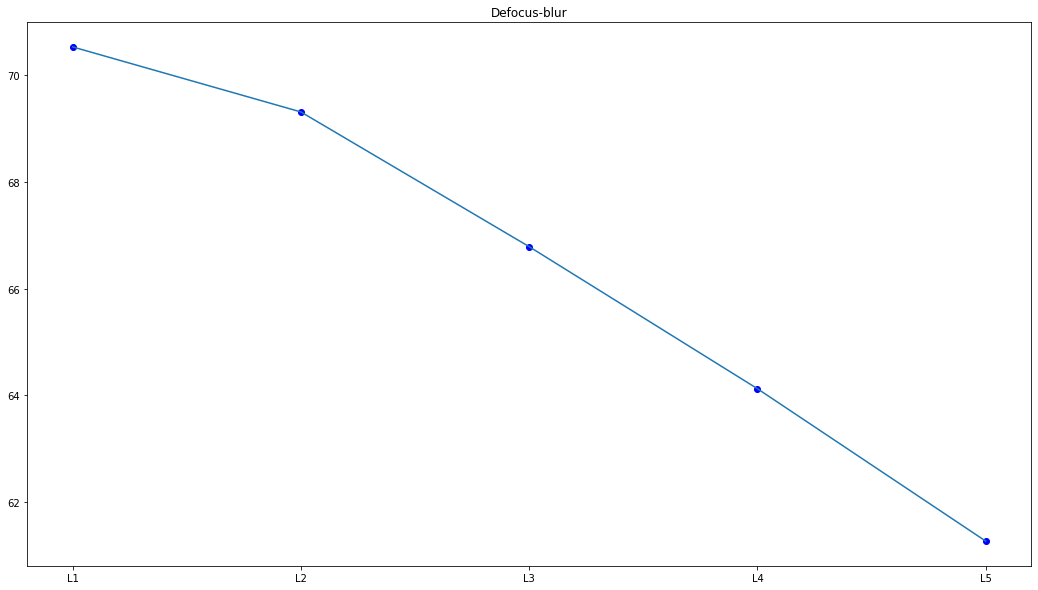

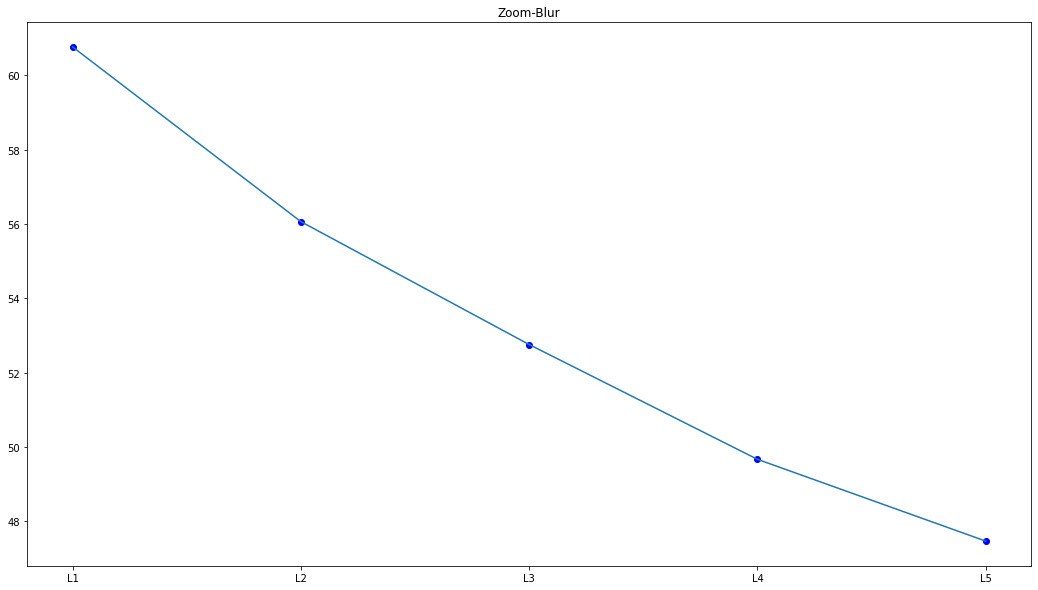

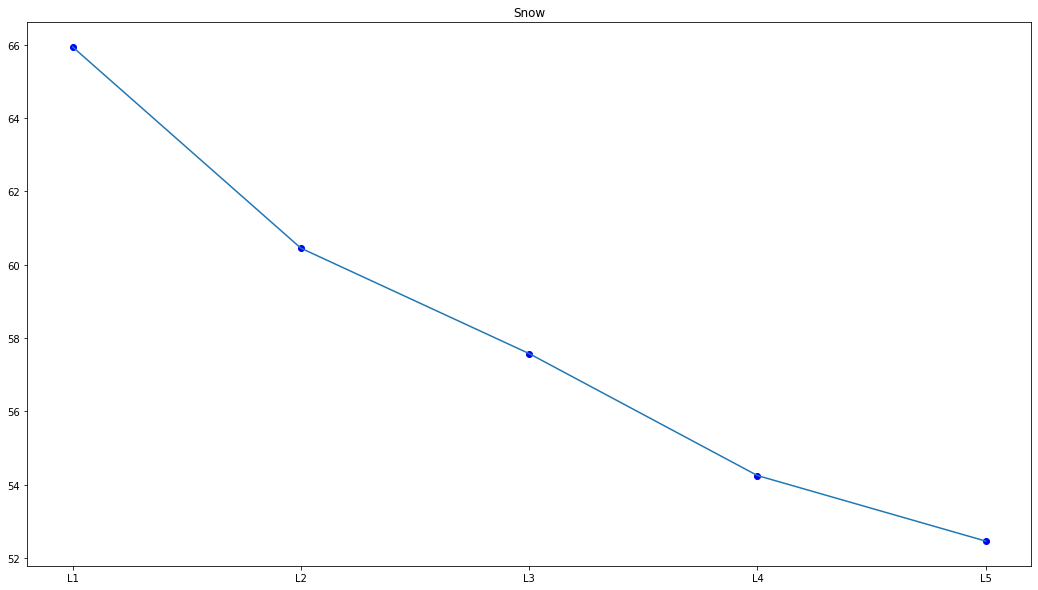

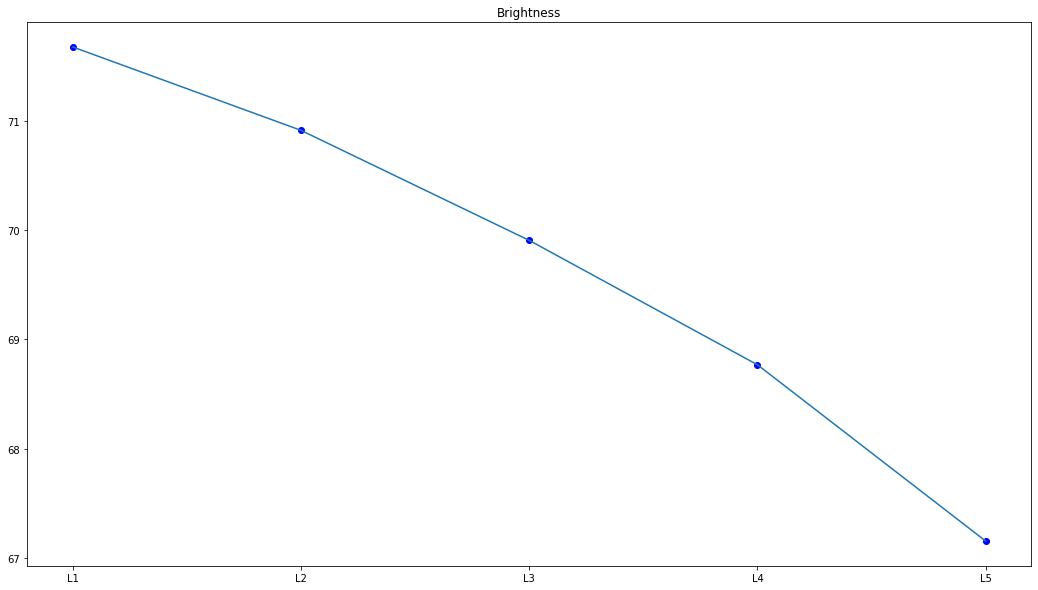

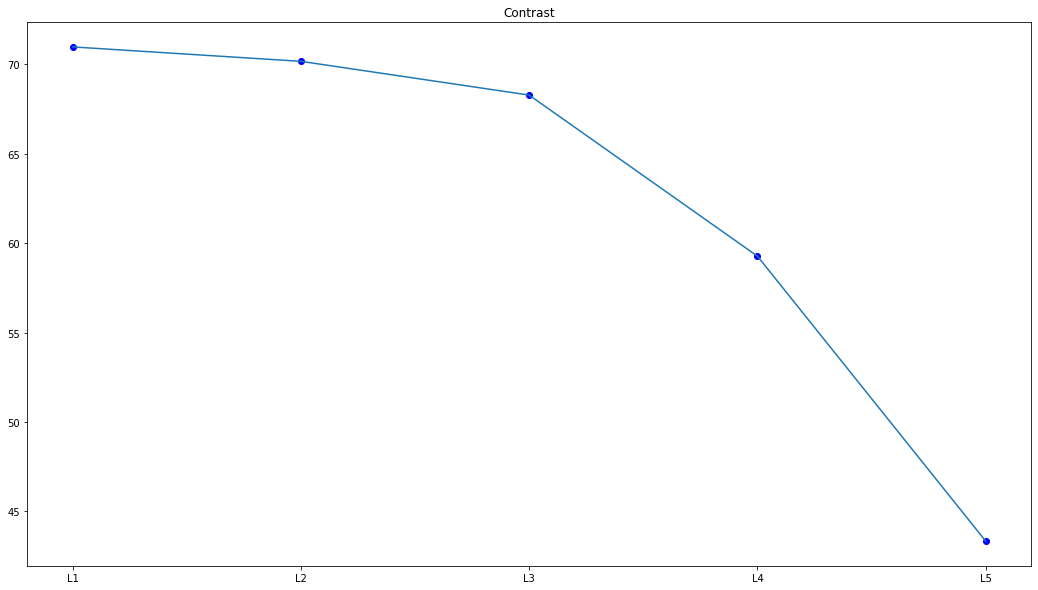

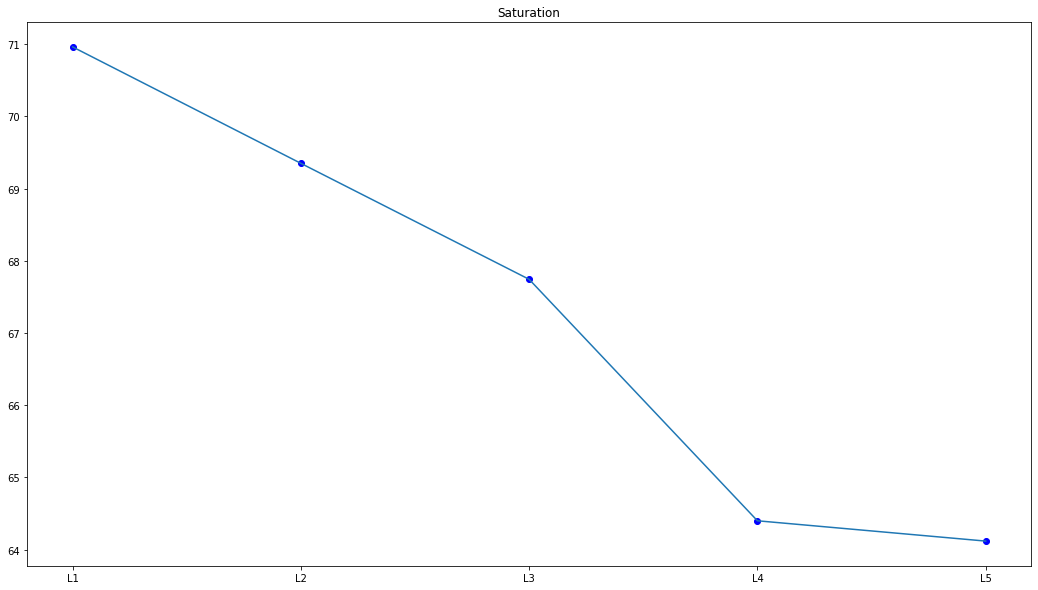

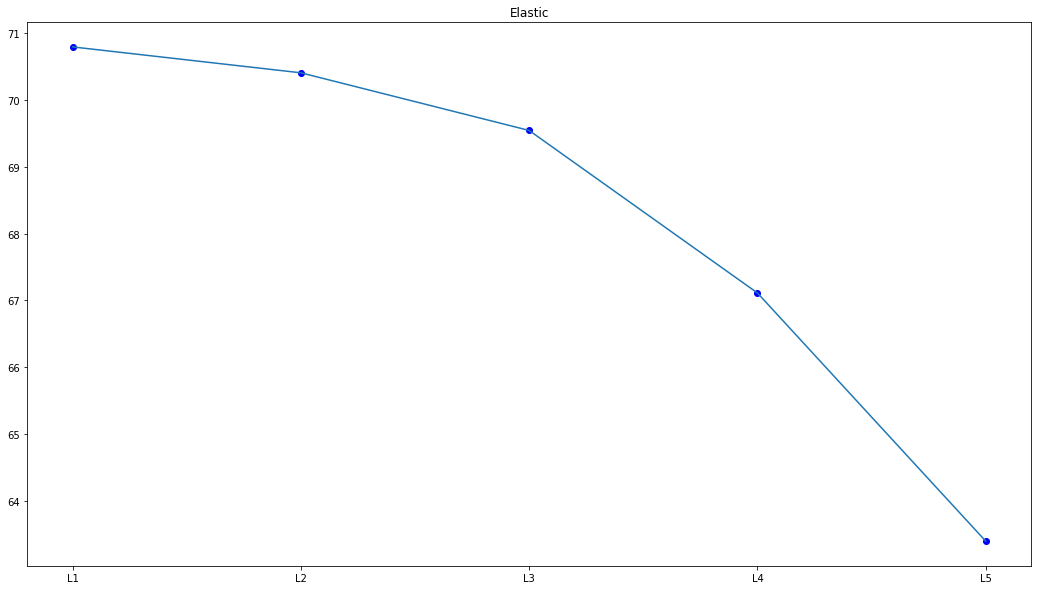

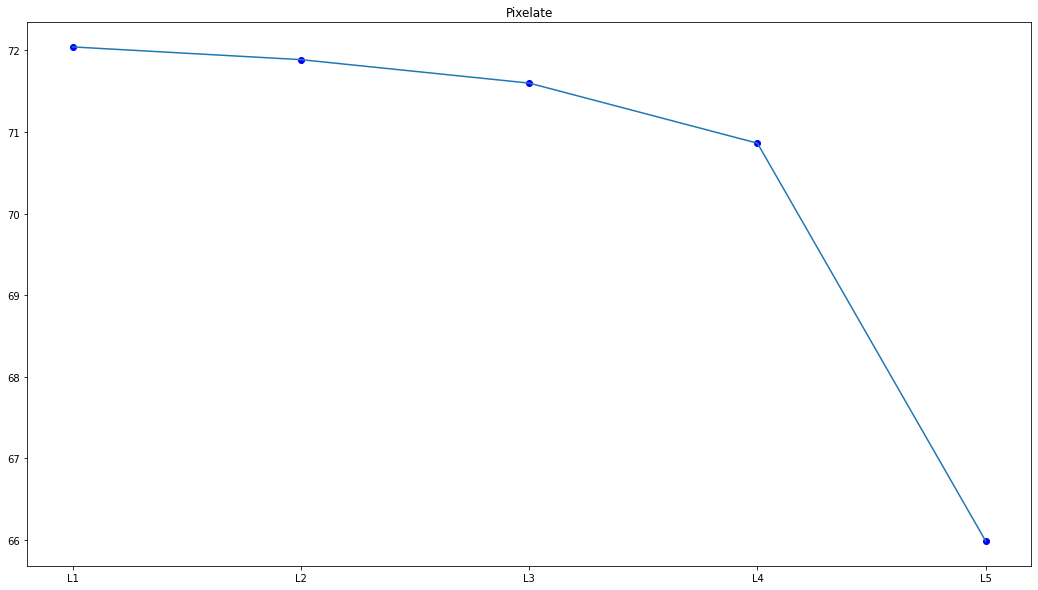

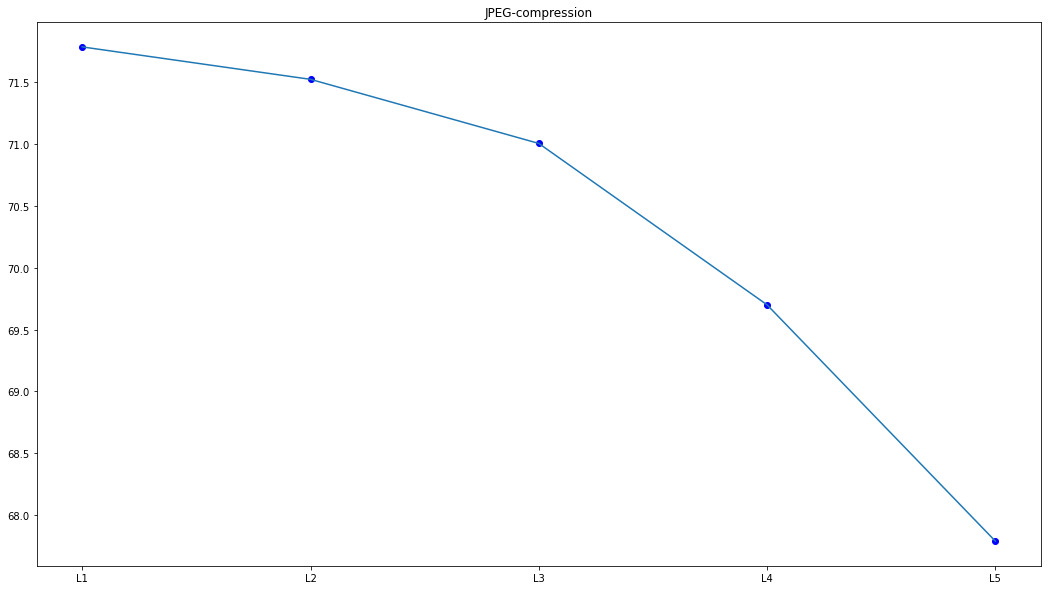

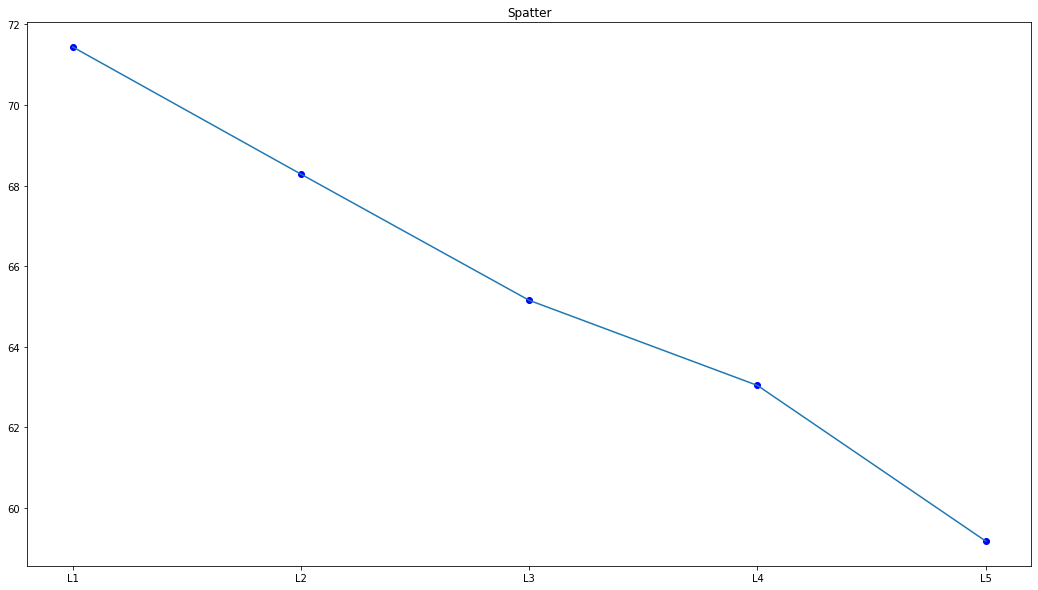

In [197]:
all_n=[]
all_v=[]
for i in all_noise:
    name=i
    levelvval(name)
    #tt_n,tt_v=levelvval(name)
    #all_n.append(tt_n)
    #all_v.append(tt_v)
    

## Analysis of all the noises together

In [198]:


all_noise=["Grayscale", "Grayscale-Inverse","Shot-noise","Gaussian-noise","Impulse-noise","Speckle-noise","Defocus-blur","Zoom-Blur","Snow","Brightness","Contrast","Saturation", "Elastic","Pixelate","JPEG-compression","Spatter"]

In [199]:
def levelvval2(name):
    n=[]
    v=[]
    num=1
    for filename2 in os.listdir(directory):
        f = os.path.join(directory, filename2)
        for filename in os.listdir(f):
            if filename[0:len(model_name)+len(name)]==model_name+name:
                f=open(directory + '\\' + name + '_L'+num.__str__()+ '\\' +filename)
                data = json.load(f)
                v.append(correct(data))
                n.append('L'+num.__str__())
                num+=1
    v.sort(reverse=True) #Had to sort because of the anomaly in the weights
    #show_scatterplot(n,v,name)
    return n,v

In [200]:
all_n=[]
all_v=[]
for i in all_noise:
    name=i
    #levelvval(name)
    tt_n,tt_v=levelvval2(name)
    all_n.append(tt_n)
    all_v.append(tt_v)
    

Text(0.5, 1.0, 'Noise vs Level Graph')

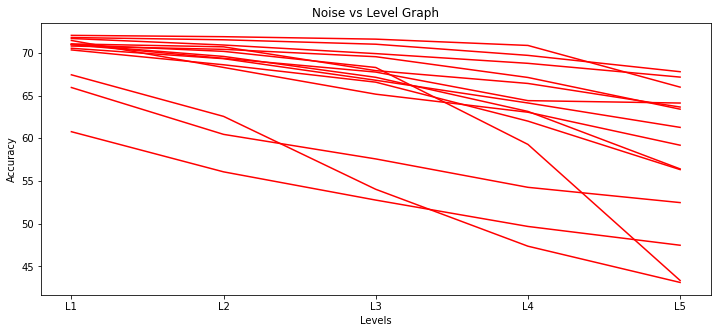

In [201]:
for i in range(0,len(all_n)):
    plt.plot(all_n[i], all_v[i], color='r', label='sin')
    
plt.xlabel("Levels")
plt.ylabel("Accuracy")
plt.title("Noise vs Level Graph")

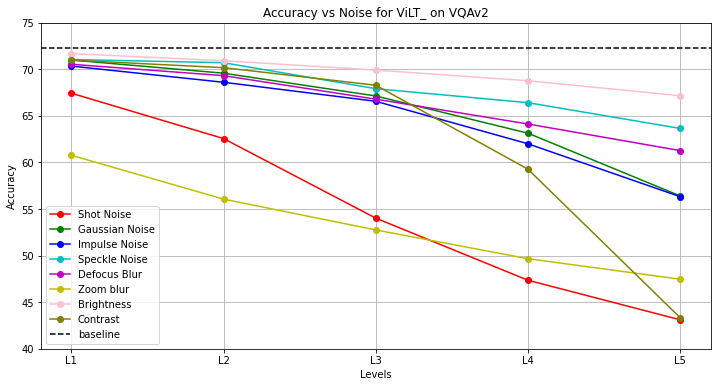

In [215]:
f, ax = plt.subplots(figsize=(12,6))
plt.plot(all_n[2], all_v[2], color='r',label='Shot Noise',marker='o')
plt.plot(all_n[3], all_v[3], color='g',label='Gaussian Noise',marker='o')
plt.plot(all_n[4], all_v[4], color='b',label='Impulse Noise',marker='o')
plt.plot(all_n[5], all_v[5], color='c',label='Speckle Noise',marker='o')
plt.plot(all_n[6], all_v[6], color='m',label='Defocus Blur',marker='o')
plt.plot(all_n[7], all_v[7], color='y',label='Zoom blur',marker='o')
plt.plot(all_n[9], all_v[9], color='pink',label='Brightness',marker='o')
plt.plot(all_n[10], all_v[10], color='olive',label='Contrast',marker='o')
plt.axhline(y = 72.3, color = 'k', linestyle = '--',label='baseline')
plt.legend(loc="lower left")
plt.xlabel("Levels")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Noise for "+ model_name+" on VQAv2")
plt.ylim(40, 75)
plt.grid()

## Analysis of the average accuracy from all the noises.

In [203]:
def compare( name ):
    total=0
    num=1
    for filename2 in os.listdir(directory):
        f = os.path.join(directory, filename2)
        for filename in os.listdir(f):
            if filename[0:len(model_name)+len(name)]==model_name+name:
                #print('yes')
                f=open(directory + '\\' + name + '_L'+num.__str__()+ '\\' +filename)
                data = json.load(f)
                total+=(correct(data))
                num+=1
    if(num==1):
        return 0,0
    return name, total/(num-1)

In [204]:
all_noise=["Grayscale", "Grayscale-Inverse","Shot-noise","Gaussian-noise","Impulse-noise","Speckle-noise","Defocus-blur","Glass-blur","Zoom-Blur","Snow","Brightness","Contrast","Saturation", "Elastic","Pixelate","JPEG-compression","Spatter"]

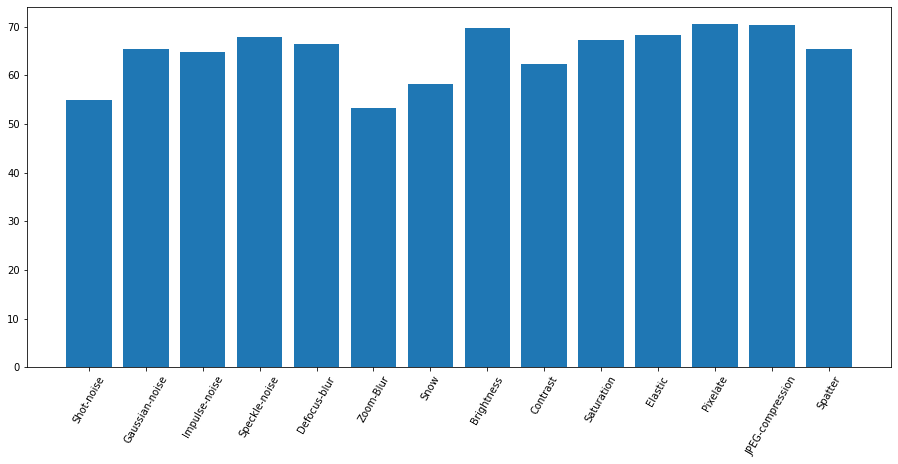

In [205]:
noise=[]
vals=[]
for i in all_noise:
    temp_noise, temp_val=compare(i)
    if(temp_val==0):
        continue
    noise.append(temp_noise)
    vals.append(temp_val)
    
show_barplot(noise, vals)

## VRE score from every noise.

In [206]:
all_noise=["Grayscale", "Grayscale-Inverse","Shot-noise","Gaussian-noise","Impulse-noise","Speckle-noise","Defocus-blur","Glass-blur","Zoom-Blur","Snow","Brightness","Contrast","Saturation", "Elastic","Pixelate","JPEG-compression","Spatter"]

In [207]:
def vre_score( name ):
    total=0
    num=1
    temp_v=[]
    for filename2 in os.listdir(directory):
        f = os.path.join(directory, filename2)
        for filename in os.listdir(f):
            if filename[0:len(model_name)+len(name)]==model_name+name:
                #print('yes')
                f=open(directory + '\\' + name + '_L'+num.__str__()+ '\\' +filename)
                data = json.load(f)
                total_temp=(correct(data))
                temp_v.append( total_temp )
                total+=total_temp
                num+=1
    if(num==1):
        return 0,0
    return name,(100- (total/(num-1)) )/( max( temp_v ) -min(temp_v) )

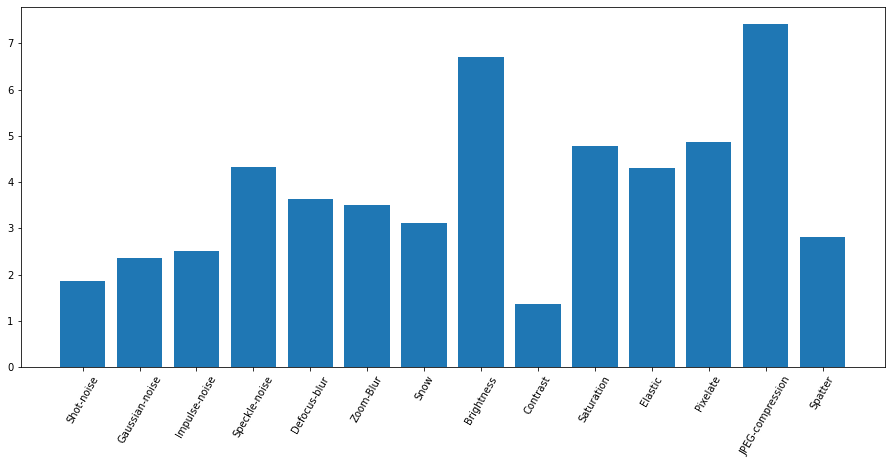

In [208]:
error=[]
vals=[]
for i in all_noise:
    temp_noise, temp_val=vre_score(i) 
    if(temp_val==0):
        continue
    error.append(temp_noise)
    vals.append(temp_val)
    
show_barplot(noise, vals)

## Question type vs Error

In [209]:
temp_dict={}
temp_dict_actual={}

In [210]:
def in_correct(data):
    num=0
    total=len(data['data'])
    for i in data['data']:
        if( i['correct']==False ):
            if( i['questionType'] in temp_dict ):
                temp_dict[i['questionType']] =temp_dict[i['questionType']]+1
            else:
                temp_dict[i['questionType']]=1
        if( i['questionType'] in temp_dict_actual ):
            temp_dict_actual[i['questionType']] =temp_dict_actual[i['questionType']]+1
        else:
            temp_dict_actual[i['questionType']] =1
            
                    
            

In [211]:
def qtype( name ):
    num=1
    for filename2 in os.listdir(directory):
        f = os.path.join(directory, filename2)
        for filename in os.listdir(f):
            if filename[0:len(model_name)+len(name)]==model_name+name:
                #print('yes')
                f=open(directory + '\\' + name + '_L'+num.__str__()+ '\\' +filename)
                data = json.load(f)
                in_correct(data)
                num+=1
    

In [212]:

for i in all_noise:
    qtype(i) 
    if(temp_val==0):
        continue
    


In [213]:
for i in temp_dict:
    temp_dict[i]=temp_dict[i]/temp_dict_actual[i] 

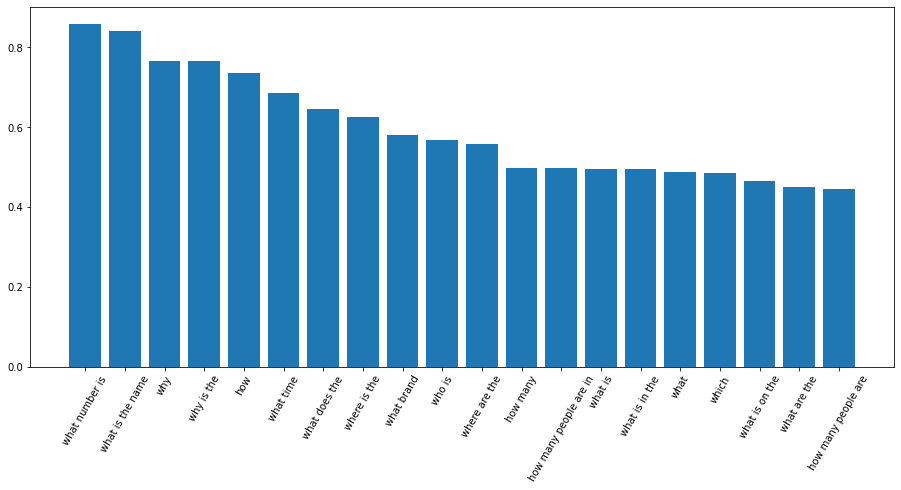

In [221]:
import operator
newA = dict(sorted(temp_dict.items(), key=operator.itemgetter(1), reverse=True)[:20])
keys_dict=[]
vals_dict=[]
for i in newA:
    keys_dict.append( i )
    vals_dict.append( newA[i] )
    
show_barplot(keys_dict, vals_dict)